## Package imports & settings

In [1]:
import os
import numpy as np
import pandas as pd


pd.set_option('display.width', 140)

----
## Reading in the data

In [3]:
RETAIL = "../data/raw/Retail data.csv"
POTENTIAL_CUSTOMERS = "../data/raw/Potential Customers.csv"

In [4]:
# data_path = RETAIL
data_path = POTENTIAL_CUSTOMERS

In [5]:
df = pd.read_csv(data_path, sep=";")

----
## Cleaning the data

### Removing redundant columns

In [6]:
df.drop("Cocunut", axis=1, inplace=True)

### Giving some columns more descriptive names

In [7]:
column_names = {
    "MARTIAL_STATUS": "MARITAL_STATUS",
    "CUST_INCOME": "INCOME",
    "CURRENT_ADDRESS_DATE": "ADDRESS_DATE",
    "CURRENT_JOB_DATE": "JOB_DATE",
    "CURRENT_WITH_BANK_DATE": "WITH_BANK_DATE",
    "CURRENT_BALANCE_EUR": "BALANCE"
}

if data_path == RETAIL:
    column_names["Mortgage_YN"] = "MORTGAGE"
    column_names["AGE_AT_ORIGINATION"] = "MORTGAGE_GETTING_AGE"

df.rename(columns=column_names, inplace=True)

### Setting unknown marital statuses as NaN (Not a Number)

In [8]:
df.loc[df["MARITAL_STATUS"] == "*noval*", "MARITAL_STATUS"] = np.NaN

### Setting correct column data types

In [9]:
# Set categorical columns

categorical_columns = [
    "MARITAL_STATUS",
    "EDUCATION",
    "EMPLOYMENT",
    "GENDER",
]

df[categorical_columns] = df[categorical_columns].astype("category")

In [10]:
# Set date columns while also setting invalid dates to NaT (Not a Time)

date_columns = [
    "ADDRESS_DATE",
    "JOB_DATE",
    "WITH_BANK_DATE",
]

df[date_columns] = df[date_columns].apply(pd.to_datetime, errors="coerce")

In [11]:
# Set monetary columns

monetary_columns = [
    "BALANCE",
    "INCOME",
]

def convert_to_eur(value: pd.Series) -> pd.Series:
    return value.str.replace(",", ".").astype(float).round(2)

df[monetary_columns] = df[monetary_columns].apply(convert_to_eur)

In [12]:
# Also set correct data types for the retail specific columns
if data_path == RETAIL:

    # Set mortgage column type as a categorical
    df["MORTGAGE"] = df["MORTGAGE"].astype("category")

    # Set mortgage getting age column type as nullable integer
    df["MORTGAGE_GETTING_AGE"] = df["MORTGAGE_GETTING_AGE"].astype("Int64")

### Setting future dates as NaT (Not a Time)

In [13]:
today = pd.to_datetime("today")

for column in date_columns:
    df.loc[df[column] > today, column] = pd.NaT

----
## Taking a look at the cleaned data

In [14]:
# First 5 rows
df.head()

,AGE,YEARS_WITH_BANK,MARITAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,INCOME,ADDRESS_DATE,JOB_DATE,WITH_BANK_DATE,BALANCE
0,32,3,M,HGH,PVE,M,423.08,1985-01-21,2005-01-01,2014-07-02,143.00
1,51,10,W,SEC,RET,F,140.61,2010-10-23,NaT,2007-02-21,2288.70
2,36,7,M,BCR,STE,F,326.92,1981-10-16,2009-09-10,2009-10-26,2268.49
3,46,11,D,BCR,TEA,F,738.82,2008-09-01,2005-11-01,2005-11-30,4536.98
4,39,10,M,HGH,PVE,M,483.93,1993-09-01,2013-06-01,2006-12-05,3076.92


In [15]:
# Last 5 rows
df.tail()

,AGE,YEARS_WITH_BANK,MARITAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,INCOME,ADDRESS_DATE,JOB_DATE,WITH_BANK_DATE,BALANCE
2742,53,5,M,SEC,PVE,F,183.46,1980-06-19,2006-07-03,2012-05-04,5407.52
2743,56,8,M,HGH,STE,F,276.92,2007-04-16,2007-04-16,2009-02-27,253.46
2744,67,5,D,BCR,RET,F,148.72,2012-09-01,1997-08-15,2012-05-28,2371.15
2745,48,1,M,HGH,STE,F,258.56,1988-01-01,1998-12-31,2015-12-15,2307.69
2746,44,14,M,HGH,PVE,M,682.95,1973-11-22,2006-01-01,2002-12-20,7692.31


In [16]:
# Numeric column statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
AGE,2747.0,48.736804,21.0,38.0,49.0,60.0,74.0,13.186774
YEARS_WITH_BANK,2747.0,6.991263,0.0,3.0,8.0,11.0,15.0,4.522815
INCOME,2747.0,368.593608,0.0,214.625,292.31,410.405,7978.96,333.434129
ADDRESS_DATE,2686,1992-02-02 13:00:02.680565888,1944-08-10 00:00:00,1981-01-01 00:00:00,1993-12-17 00:00:00,2006-01-01 00:00:00,2016-04-01 00:00:00,NaN
JOB_DATE,2036,2006-03-21 13:58:49.273084416,1974-01-08 00:00:00,2001-11-27 06:00:00,2008-06-16 00:00:00,2013-08-01 00:00:00,2016-10-12 00:00:00,NaN
WITH_BANK_DATE,2747,2009-12-21 06:14:48.532945152,2001-09-11 00:00:00,2005-10-11 00:00:00,2009-01-16 00:00:00,2014-03-18 12:00:00,2016-10-19 00:00:00,NaN
BALANCE,2747.0,3122.631551,0.0,1274.98,2307.69,4615.38,18176.99,2447.362194


In [17]:
# Categorical column statistics
df.describe(include=["category"]).T

,count,unique,top,freq
MARITAL_STATUS,2706,4,M,1898
EDUCATION,2747,8,HGH,1872
EMPLOYMENT,2747,6,PVE,1186
GENDER,2747,2,M,1379


In [18]:
# Unique categories
for column in categorical_columns:
    print(f"{column}: {df[column].unique().tolist()}")

MARITAL_STATUS: ['M', 'W', 'D', 'S', nan]
EDUCATION: ['HGH', 'SEC', 'BCR', 'MAS', 'PRS', 'PHD', 'PRI', 'OTH']
EMPLOYMENT: ['PVE', 'RET', 'STE', 'TEA', 'SFE', 'OTH']
GENDER: ['M', 'F']


In [19]:
# Feature overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AGE              2747 non-null   int64         
 1   YEARS_WITH_BANK  2747 non-null   int64         
 2   MARITAL_STATUS   2706 non-null   category      
 3   EDUCATION        2747 non-null   category      
 4   EMPLOYMENT       2747 non-null   category      
 5   GENDER           2747 non-null   category      
 6   INCOME           2747 non-null   float64       
 7   ADDRESS_DATE     2686 non-null   datetime64[ns]
 8   JOB_DATE         2036 non-null   datetime64[ns]
 9   WITH_BANK_DATE   2747 non-null   datetime64[ns]
 10  BALANCE          2747 non-null   float64       
dtypes: category(4), datetime64[ns](3), float64(2), int64(2)
memory usage: 162.0 KB


In [20]:
# Number of missing values in each column
df.isna().sum()

AGE                  0
YEARS_WITH_BANK      0
MARITAL_STATUS      41
EDUCATION            0
EMPLOYMENT           0
GENDER               0
INCOME               0
ADDRESS_DATE        61
JOB_DATE           711
WITH_BANK_DATE       0
BALANCE              0
dtype: int64

In [21]:
# Ratio of missing values in each column
df.isna().mean().round(4)

AGE                0.0000
YEARS_WITH_BANK    0.0000
MARITAL_STATUS     0.0149
EDUCATION          0.0000
EMPLOYMENT         0.0000
GENDER             0.0000
INCOME             0.0000
ADDRESS_DATE       0.0222
JOB_DATE           0.2588
WITH_BANK_DATE     0.0000
BALANCE            0.0000
dtype: float64

----
## Taking a look at the value distribution of each column

<Axes: title={'center': 'Age distribution'}, xlabel='Age', ylabel='Count'>

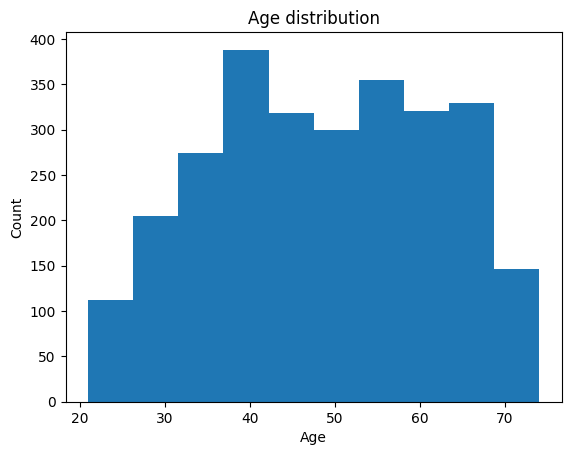

In [22]:
df["AGE"].plot(kind="hist", title="Age distribution", xlabel="Age", ylabel="Count")

<Axes: title={'center': 'Years with bank distribution'}, xlabel='Years with bank', ylabel='Count'>

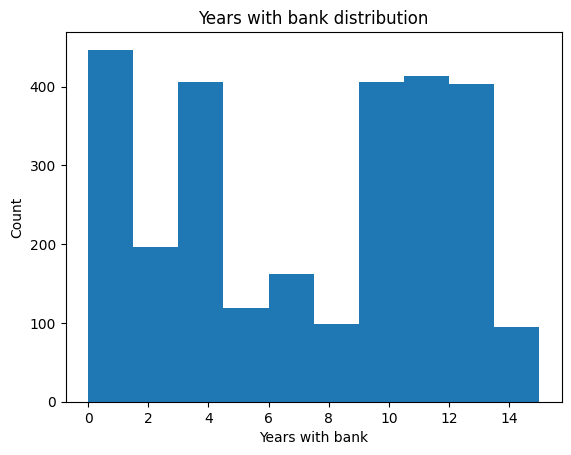

In [23]:
df["YEARS_WITH_BANK"].plot(kind="hist", title="Years with bank distribution", xlabel="Years with bank", ylabel="Count")

<Axes: title={'center': 'Marital status distribution'}, xlabel='Marital status', ylabel='Count'>

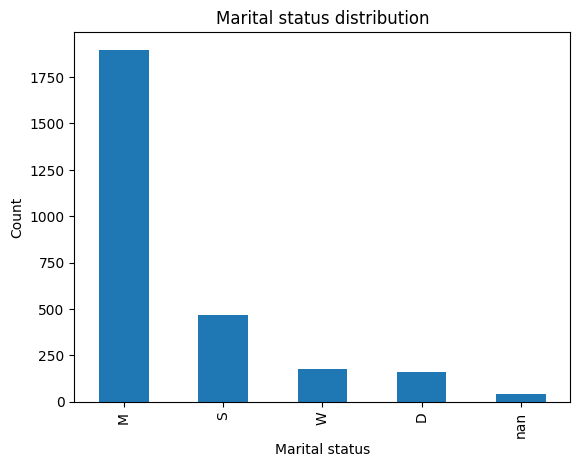

In [24]:
df["MARITAL_STATUS"].value_counts(dropna=False).plot(kind="bar", title="Marital status distribution", xlabel="Marital status", ylabel="Count")

<Axes: title={'center': 'Education distribution'}, xlabel='Education', ylabel='Count'>

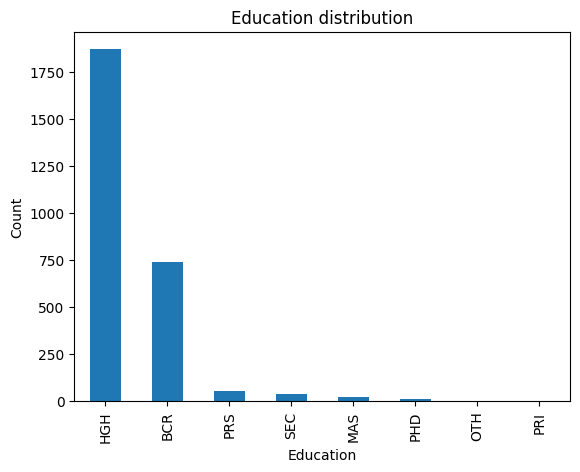

In [25]:
df["EDUCATION"].value_counts().plot(kind="bar", title="Education distribution", xlabel="Education", ylabel="Count")

<Axes: title={'center': 'Employment distribution'}, xlabel='Employment', ylabel='Count'>

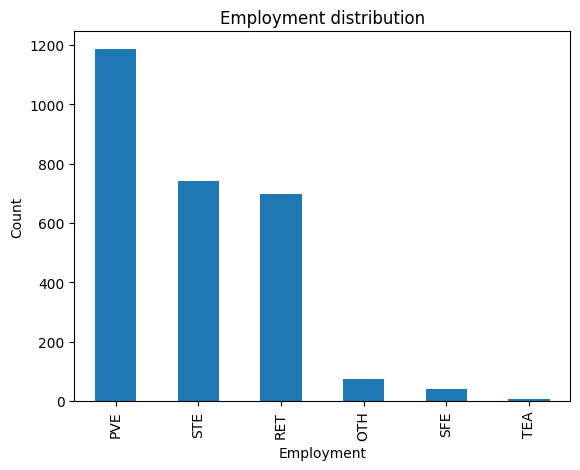

In [26]:
df["EMPLOYMENT"].value_counts().plot(kind="bar", title="Employment distribution", xlabel="Employment", ylabel="Count")

<Axes: title={'center': 'Gender distribution'}, xlabel='Genders', ylabel='Count'>

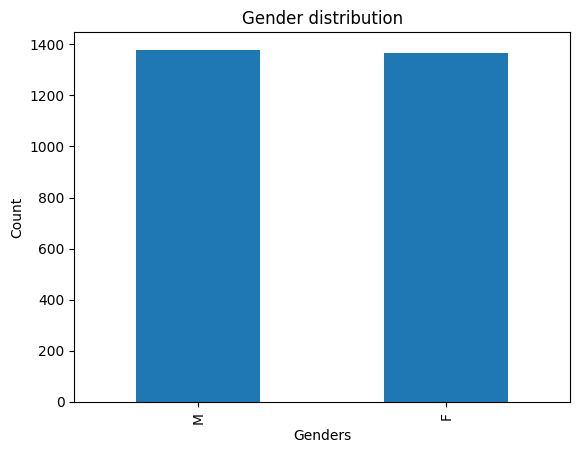

In [27]:
df["GENDER"].value_counts().plot(kind="bar", title="Gender distribution", xlabel="Genders", ylabel="Count")

<Axes: title={'center': 'Income distribution'}, xlabel='Income (EUR/month)', ylabel='Count'>

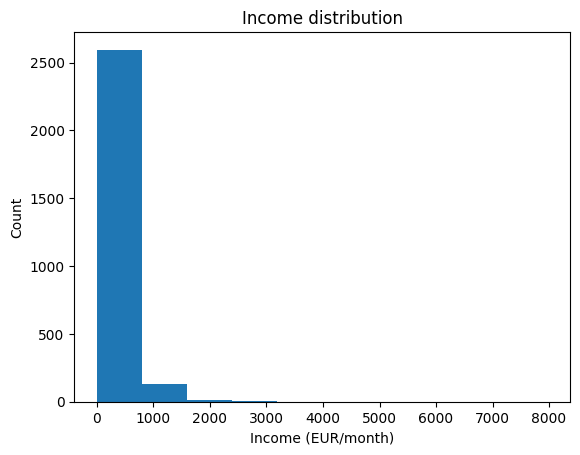

In [28]:
df["INCOME"].plot(kind="hist", title="Income distribution", xlabel="Income (EUR/month)", ylabel="Count")

<Axes: title={'center': 'Address date distribution'}, xlabel='Address date', ylabel='Count'>

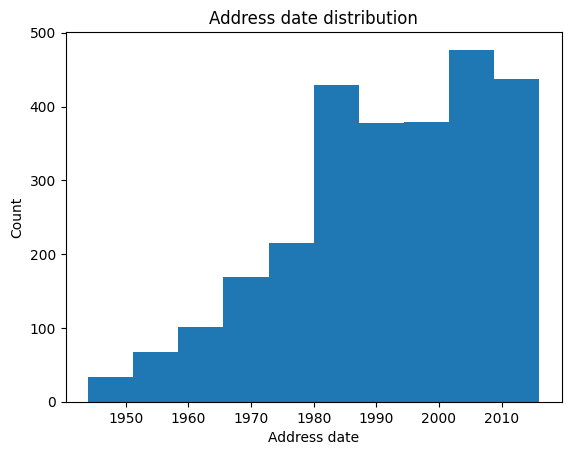

In [29]:
df["ADDRESS_DATE"].dt.year.plot(kind="hist", title="Address date distribution", xlabel="Address date", ylabel="Count")

<Axes: title={'center': 'Job date distribution'}, xlabel='Job date', ylabel='Count'>

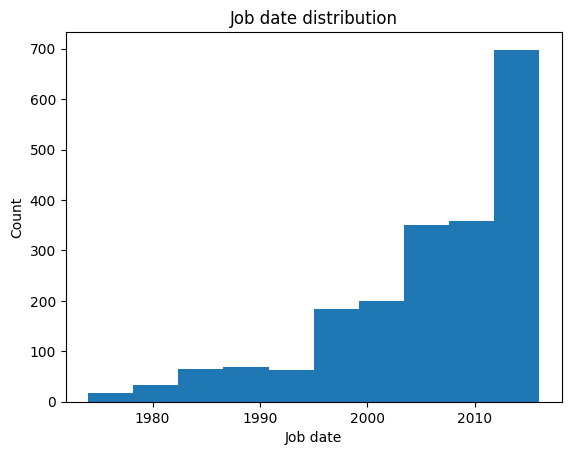

In [30]:
df["JOB_DATE"].dt.year.plot(kind="hist", title="Job date distribution", xlabel="Job date", ylabel="Count")

<Axes: title={'center': 'With bank date distribution'}, xlabel='With bank date', ylabel='Count'>

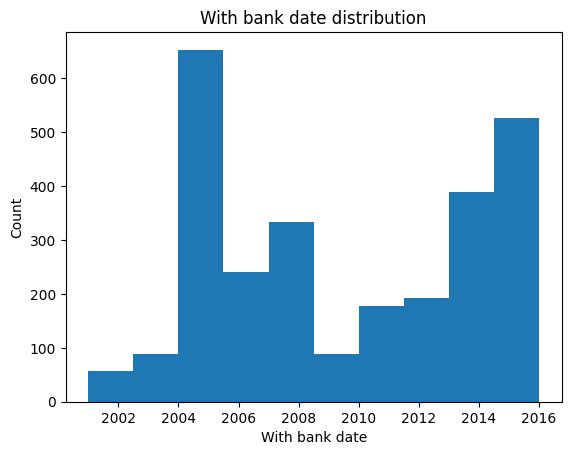

In [31]:
df["WITH_BANK_DATE"].dt.year.plot(kind="hist", title="With bank date distribution", xlabel="With bank date", ylabel="Count")

<Axes: title={'center': 'Balance distribution'}, xlabel='Balance (EUR)', ylabel='Count'>

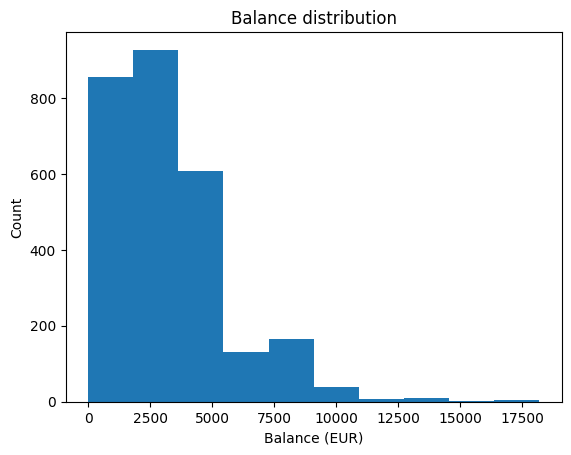

In [32]:
df["BALANCE"].plot(kind="hist", title="Balance distribution", xlabel="Balance (EUR)", ylabel="Count")

In [33]:
if data_path == RETAIL:
    df["MORTGAGE_GETTING_AGE"].plot(kind="hist", title="Mortgage getting age distribution", xlabel="Mortgage getting age", ylabel="Count")

In [34]:
if data_path == RETAIL:
    df["MORTGAGE"].value_counts(dropna=False).plot(kind="bar", title="Mortgage distribution", xlabel="Mortgage", ylabel="Count")

----
## Saving the cleaned data

In [35]:
save_path = data_path.replace("raw", "processed/clean")
save_dir = os.path.dirname(save_path)

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

df.to_csv(save_path, index=False, sep=";")